In [2]:
%ls

areaData_30m_N51N55_W11W06.csv  ireland_sites.csv
britain-srtm-30m/               one_class_svm/
britain-srtm-90m/               predict_sites_elevation.csv
calculated_aqua_distances/      retrieve_coord_elevation.ipynb
common_sites_aqua_distance.csv  sites.csv
elevation_heatmap.png           srtm.py
file_download.py                srtm.pyc
heatmap_plotting.ipynb


<h3>
Plotting points from sites.csv
<br>
<br>
Plotting heatmap from ireland_sites.csv
</h3>

Import data

In [2]:
%matplotlib inline

import os
import csv
import numpy  as np
import pandas as pd

import matplotlib
matplotlib.use('nbagg')

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

data_folder = ''
data_file = 'sites.csv'
commonsites = os.path.join(data_folder, data_file)
df = pd.read_csv(commonsites, sep=',', error_bad_lines=False)
df.dropna()

height_data_folder = ''
height_data_file = 'ireland_sites.csv'
commonsites = os.path.join(height_data_folder, height_data_file)
height_df = pd.read_csv(commonsites, sep=',', error_bad_lines=False)
df.dropna()

df.head(10)
# height_df.head(10)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/traitlets/config/application.py"

,Country,Latitude,Longitude,SiteID,SiteName,slope,Profile cu,ele30m,tangential,aspect,lake,river
0,Great Britain,51.9691,-5.0823,S1010,Abermawr I,7.47827,-0.00108,11,-0.00141,233.23158,1.814888,1.662733
1,Great Britain,51.6800,-1.2613,S1011,Abingdon,0.78879,-0.00036,59,-0.00152,241.79982,4.349531,0.290761
2,Great Britain,50.9969,-0.8798,S1040,adjacent to barrows excavated 1973-5,6.83334,0.00172,54,0.00173,344.33316,3.798896,0.960163
3,Great Britain,56.9485,-7.5241,S1072,Alt Chrysal,13.02903,-0.00150,17,0.00028,275.50116,1.804370,1.930712
4,Ireland,54.5680,-7.0367,S1073,Altanagh,3.95142,0.00196,181,0.00080,275.78076,0.641170,0.140272
5,Great Britain,52.5563,-0.2902,S1075,Alton Longville,5.74562,-0.00211,5,-0.00275,105.29366,5.465979,0.249974
6,Great Britain,57.6368,-6.2042,S1081,An Corran,5.66940,-0.00194,2,0.00143,40.63331,0.654734,1.758929
7,Great Britain,54.1014,-6.6173,S1087,Annaghmare,3.65238,0.00000,119,0.00000,329.55670,0.912949,0.202497
8,Great Britain,53.3446,-1.2053,S1089,Anston Stones Cave,5.15504,0.00015,105,-0.00185,238.38181,4.289628,0.474782
9,Great Britain,51.4899,-0.2354,S1090,Hammersmith,5.96952,0.00285,3,-0.00288,248.17577,4.499405,0.677580


Preprocess sites.csv Data

In [3]:
country1 = ''
country2 = 'Ireland'

country_df = df.where((df['Country'] == country1) | (df['Country'] == country2))
# country_df = df
# set min and max latitude and longitude
minlat = country_df['Latitude'].min()
maxlat = country_df['Latitude'].max()
minlon = country_df['Longitude'].min()
maxlon = country_df['Longitude'].max()

difflat = maxlat - minlat
difflon = maxlon - minlon

country_df = country_df.dropna()

Set Boundaries of Map

In [4]:
# set min and max latitude and longitude
minlat = height_df['Latitude'].min()
maxlat = height_df['Latitude'].max()
minlon = height_df['Longitude'].min()
maxlon = height_df['Longitude'].max()

difflat = maxlat - minlat
difflon = maxlon - minlon

minlat -= (difflat / 10) * 2
maxlat += (difflat / 10) * 2
minlon -= (difflon / 10) * 2
maxlon += (difflon / 10) * 2


height_df = height_df.dropna()

In [34]:
list(df)

['Country',
 'Latitude',
 'Longitude',
 'SiteID',
 'SiteName',
 'slope',
 'Profile cu',
 'ele30m',
 'tangential',
 'aspect',
 'lake',
 'river']

41.46093
0.0


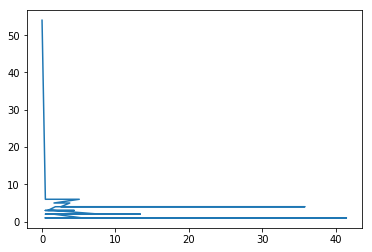

In [41]:
print df.slope.max()
print df.slope.min()
df.slope.value_counts().plot()

In [9]:
list(height_df)

['id',
 'Latitude',
 'Longitude',
 'Elevation',
 'lake',
 'river',
 'aspect',
 'slope',
 'ele30m']

Text(0,0.5,u'Latitude\n\n\n')

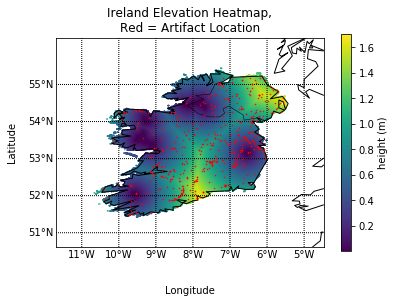

In [10]:
# Plot the geological features
m = Basemap(projection='cyl',
            llcrnrlat=minlat,
            urcrnrlat=maxlat,     
            llcrnrlon=minlon,
            urcrnrlon=maxlon,
            resolution='l')

m.drawparallels(np.arange(int(minlat),int(maxlat),1),labels=[1,0,0,0])
m.drawmeridians(np.arange(int(minlon),int(maxlon),1),labels=[0,0,0,1])
m.fillcontinents(color='None')

m.drawcoastlines()
m.drawcountries()
m.drawstates()
# m.drawrivers()
# m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF')
# m.drawmapboundary(fill_color='#FFFFFF')
# m.bluemarble()

# Plot Ireland Heatmap
column = 'lake'

heightlat = np.array(height_df['Latitude'].tolist())
heightlon = np.array(height_df['Longitude'].tolist())
z = np.array(height_df[column].tolist())
x, y = m(heightlon, heightlat)
plt.scatter(x, y, c=z, s=.1)
plt.colorbar(label='height (m)')

# Plot sites.csv scatterplots

lat = np.array(country_df['Latitude'].tolist())
lon = np.array(country_df['Longitude'].tolist())

x, y = m(lon, lat)
m.plot(x, y, 'r.', markersize=1)

# Plot labels
plt.title('Ireland Elevation Heatmap,\nRed = Artifact Location')
plt.xlabel('\n\n\nLongitude')
plt.ylabel('Latitude\n\n\n')

In [11]:
plt.show()